In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 21s 2us/step


In [3]:
len(X_train)  #train data

60000

In [4]:
len(X_test)  #test data

10000

In [5]:
X_train[0].shape   #28*28

(28, 28)

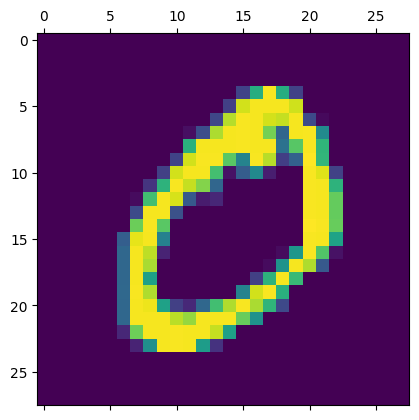

In [7]:
plt.matshow(X_train[1])   #create a matrix plot

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [16]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [18]:
X_train_flattened.shape

(60000, 784)

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4740 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3036 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2670 - accuracy: 0.9263


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.9259


[0.26563557982444763, 0.9258999824523926]

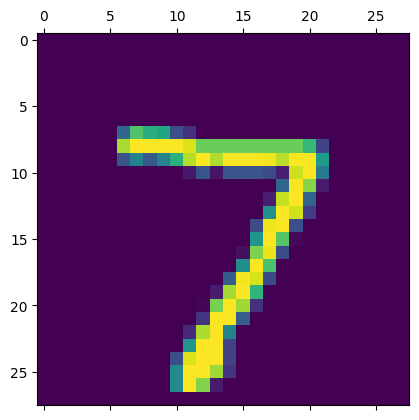

In [23]:
plt.matshow(X_test[0])

In [24]:
y_predicted = model.predict(X_test_flattened)  #return array
y_predicted[0]  #first element print

313/313 [==============================] - 1s 3ms/step


array([1.89551767e-02, 2.42370390e-07, 4.34708931e-02, 9.60273802e-01,
       1.92392990e-03, 1.06641516e-01, 1.44723526e-06, 9.99798834e-01,
       1.02549136e-01, 6.09517276e-01], dtype=float32)

In [29]:
np.argmax(y_predicted[0])  #np.argmax finds a maximum element from an array and returns the index of it

7

In [30]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]  #will give highest index number for all y-predicted

In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    5,    8,    2,    3,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    8,  924,   16,    8,    6,   10,   11,   41,    4],
       [   1,    0,   15,  924,    0,   27,    2,   12,   23,    6],
       [   1,    1,    5,    2,  912,    0,   11,    5,   11,   34],
       [   8,    2,    3,   34,    6,  784,   10,    5,   35,    5],
       [   9,    3,    8,    1,    7,   20,  905,    2,    3,    0],
       [   1,    5,   21,    6,    6,    1,    0,  956,    5,   27],
       [   5,    8,    7,   19,    9,   26,    8,   12,  874,    6],
       [  10,    7,    1,   10,   28,    8,    0,   28,    9,  908]])>

Text(95.72222222222221, 0.5, 'Truth')

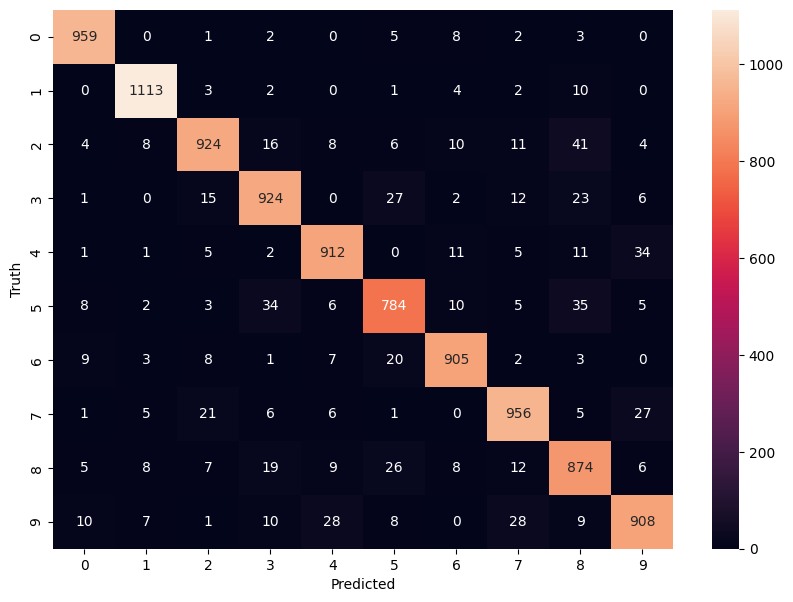

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Hidden layer

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2772 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1243 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0869 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0659 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0522 - accuracy: 0.9840


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9779


[0.07602851092815399, 0.9779000282287598]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

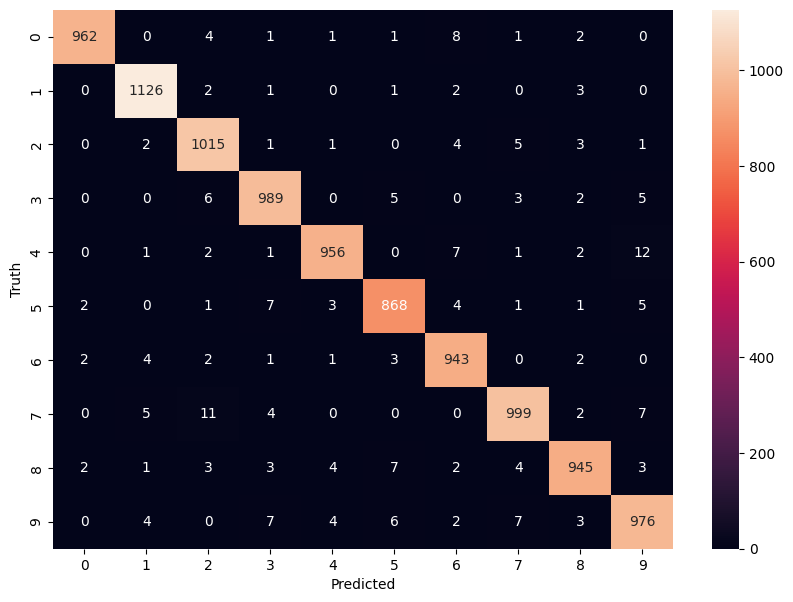

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset 

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2663 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1200 - accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0847 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0648 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0509 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0412 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0329 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0274 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0223 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9765


[0.08009447902441025, 0.9764999747276306]